<a href="https://colab.research.google.com/github/dekapd99/Kaggle-EDA-Heart-Attack-Prediction/blob/master/Kaggle-EDA-Heart-Attack-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Get dataset url from github repository
url = "https://raw.githubusercontent.com/dekapd99/Kaggle-EDA-Heart-Attack-Prediction/master/heart.csv"

# Read the dataset with pandas
try:
    df = pd.read_csv(url, delimiter=',')
except pd.errors.ParserError as e:
    print("Error occurred while parsing the CSV file:", e)

df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
new_columns = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df.columns = new_columns
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (303, 14)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Analysis Outputs (1)
* The Data Set consists of 303 Rows and 14 Columns.
* The type of all the variables in the data set are in numerical format. (Integer Or Float)
* According to first impressions, there is no missing value(NaN Value) in the data set.

### 3. Preparation for Exploratory Data Analysis (EDA)

3.1 Examining Missing Values

In [7]:
df.isnull().sum() # The Result = No Missing Value

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
isnull_number = []
for i in df.columns:
  x = df[i].isnull().sum()
  isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Value"])

,Total Missing Value
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


<Axes: >

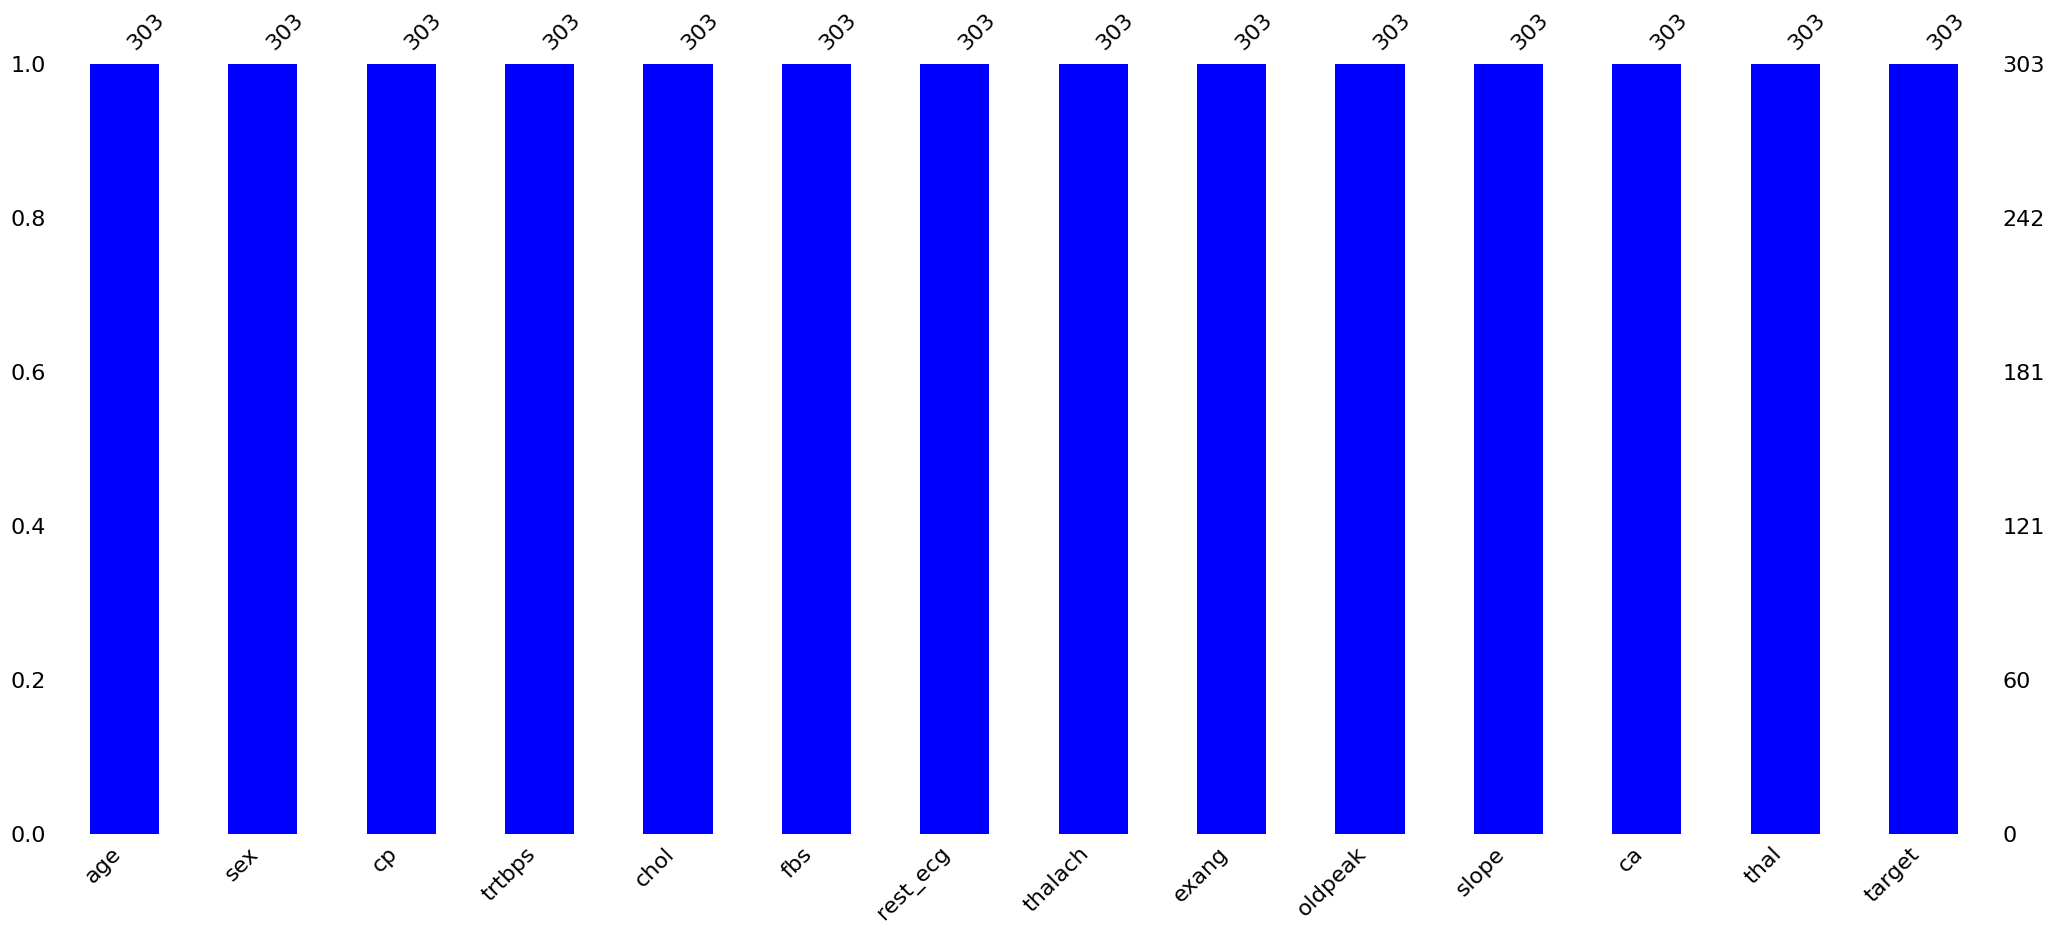

In [9]:
import missingno
missingno.bar(df, color = "b")

3.2 Examining Unique Value

In [10]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
# Looking at CP columns / variable to check the Value and the Count of Each the Same Value
df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [12]:
df["cp"].value_counts().sum()

303

In [13]:
df["cp"].value_counts().count()

4

In [14]:
unique_number = []
for i in df.columns:
  x = df[i].value_counts().count()
  unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Value"])

,Total Unique Value
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


### Analysis Outputs(2)

* **According to the result from the unique value dataframe**;
* We determined the variables with few unique values ​​as categorical variables, and the variables with high unique values ​​as numeric variables.
* In this context, **Numeric Variables**: “age”, “trtbps”, “chol”, “thalach” and “oldpeak ”
* **Categorical Variables**: "sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"
* In the next section, we will separate these 2 groups into 2 different lists.

In [15]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Seperating Numeric & Categoric Data
* Numeric Var = Quantitative Data obtained from a Variable and the value has a sense of size (Age, Temperature, Weight)
* Categoric Var = Symbolic / Qualitative Data but can also be a number (Gender, True / False, Target

In [16]:
numeric_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

### Examining Statistics of Variables

In [17]:
# Method of describe() -> Working as removing the missing values in the dataset and returns the result accordingly
# In this case there are no missing value
df[numeric_var].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


### 3.4.1 Analysis Outputs(3)
Note: Different graphics were used in the analysis to develop visualization skills.

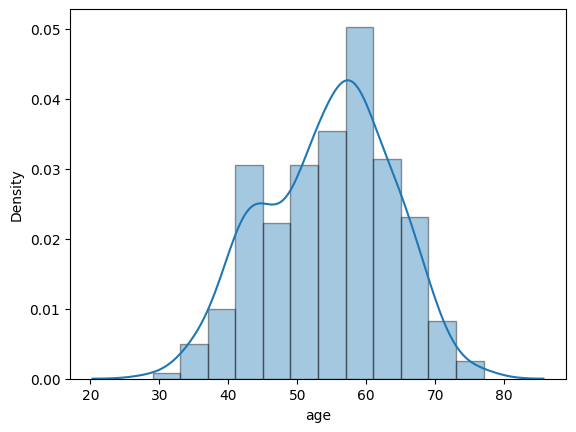

In [18]:
sns.distplot(df["age"], hist_kws = dict(linewidth = 1, edgecolor = "k"));

**Analysis of "age" variable according to Describe() method**
The minimum value of the ages is 29, and the maximum value is 77.
* So, if we don't look at other data, only these two data should mean that the midpoint must be 53 from the mathematical operation ((29 + 77) / 2).
* The mean of the data for the age is 54. Isn't the average of the minimum and maximum values that we found just by mathematical calculations 53?
* They are almost equal to each other.
* That means the age variable has a normal distribution. The normal distribution is the ideal statistical distribution for us.
* Let's look at the quartiles.
* The data average is in the middle of the 25% and 75% quarters. This means that the age variable is prone to the normal distribution.

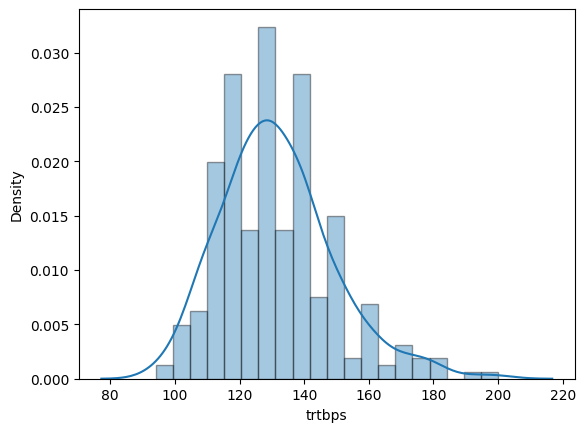

In [19]:
sns.distplot(df["trtbps"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20);

** Analysis of "trtbps" variable according to Describe() method **
* The minimum value for the "trtbps" variable is 94, and the maximum value is 200. The average of these two numbers is 147.
* The major average is 131.
* There is not much difference between 131 and 147. "trtbps" data tends to be normally distributed.
* However, very little data remains on the left side of 147. This means that when we take the midpoint of the minimum value and the maximum value as a basis, the data on the left is more than on the right.
* So, there will be a small queue towards the right side due to the lack of data on the right side.
* In summary, we can say that this data is prone to a normal distribution, but there is a slight right skew.

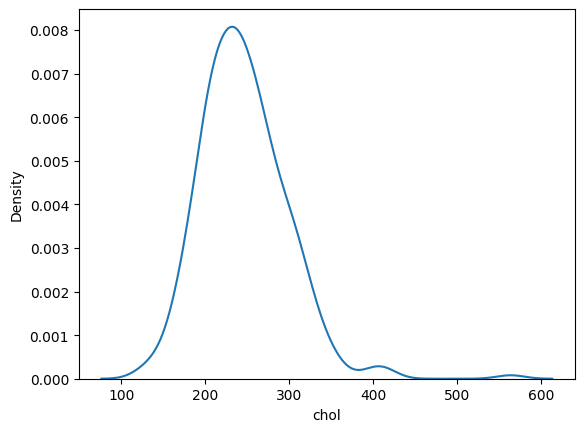

In [20]:
sns.distplot(df["chol"], hist = False);

** Analysis of "chol" variable according to Describe() method **
* The minimum value for the "chol" variable is 126, and the maximum is 564. The middle of these two values is 345.
* The major average is 246.
* When viewed, the mean is slight to the left of the midpoint of the minimum and maximum value.
* Let's check the quartiles. There are values up to 274 in the first 75 percent. Considering that the maximum value is 564, we see that most of the data is on the left.
* So data is slightly skewed to the right due to values that outlier

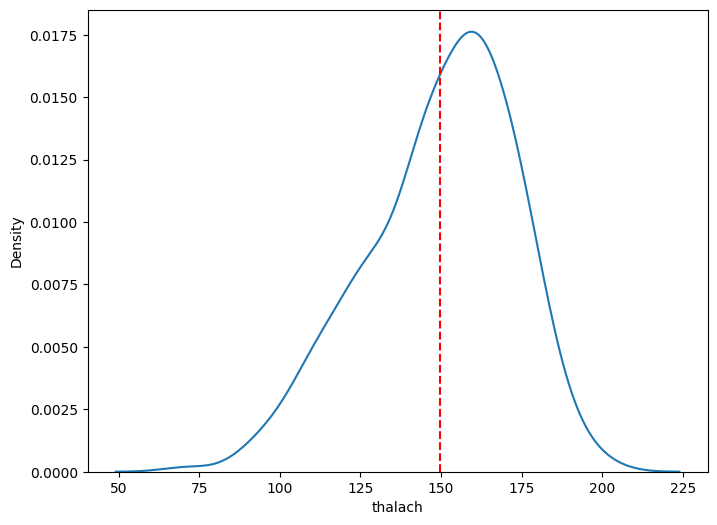

In [21]:
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["thalach"], hist = False, ax = y)
y.axvline(df["thalach"].mean(), color = "r", ls = "--");

** Analysis of "thalach" variable according to Describe() method **
* The minimum value of the "thalach" variable is 71. The maximum value is 202. According to these two values, the midpoint value is 137.
* The central average is 149.6
* So there is a left skew, although not much.
* When we examine the quartiles, The 25%, 50%, and 75% sections between the minimum and maximum values are homogeneously distributed.
* As a result, the data tends to be normally distributed, but there is a slight left skew.

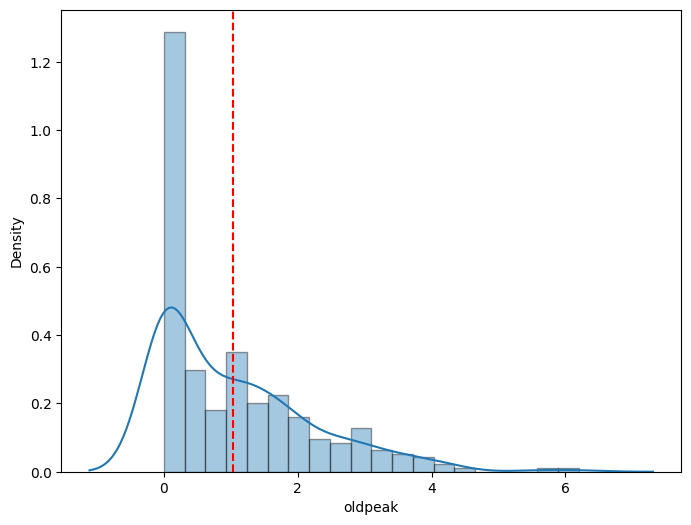

In [22]:
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["oldpeak"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20, ax = y)
y.axvline(df["oldpeak"].mean(), color = "r", ls = "--");

** Analysis of "oldpeak" variable according to Describe() method **
* The minimum value of the "oldpeak" variable is 0, the maximum value is 6.20, so the middle point according to these two values is 3.10
* When we look at the mean, we see that it is 1.03
* When we examine the quartiles, 75% of the data consists of values up to 1.60
* This shows that; There is an incredible right skew in the data.

# Exploratory Data Analysis (EDA)

## 4.1 Uni-variate Analysis

### 4.1.1 Numeric Variables (Analysis with Distplot)

In [23]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [24]:
numeric_axis_name = ["Age of the Patient", "Resting Blood Pressure", "Cholestorel Level", "Maximum Heart Rate Achieved", "ST Depression"]

In [25]:
# Changing the variable inside categoric_var
# With the new that we just created called categoric_axis_name

list(zip(numeric_var, numeric_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholestorel Level'),
 ('thalach', 'Maximum Heart Rate Achieved'),
 ('oldpeak', 'ST Depression')]

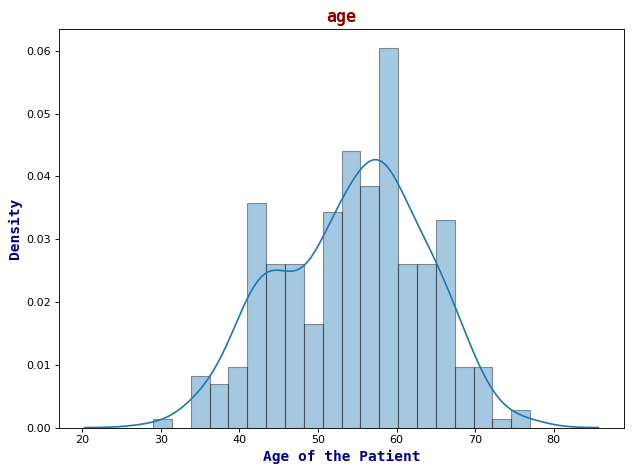

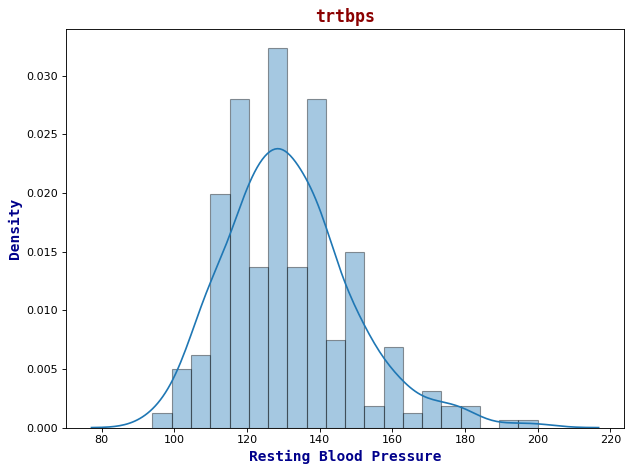

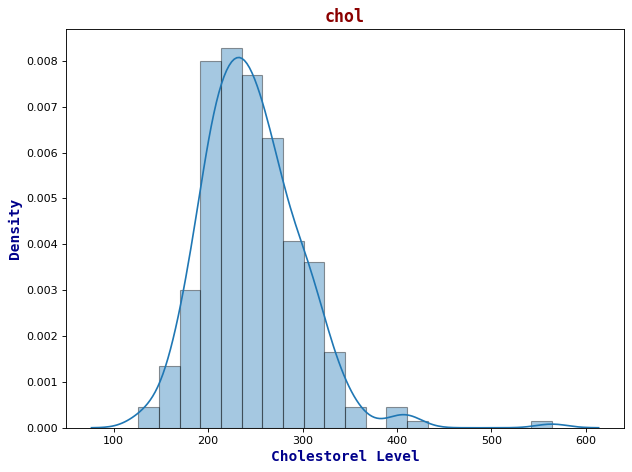

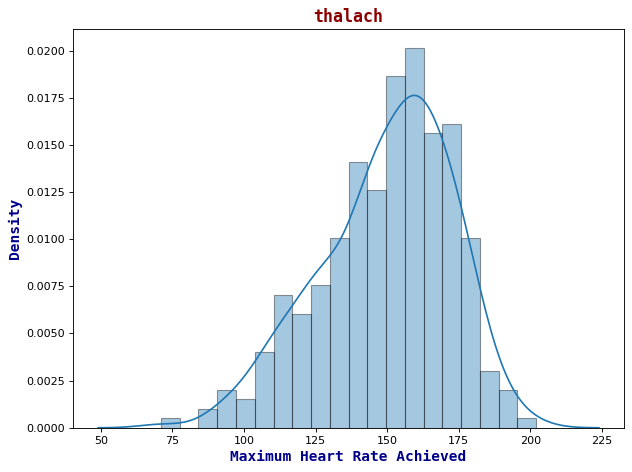

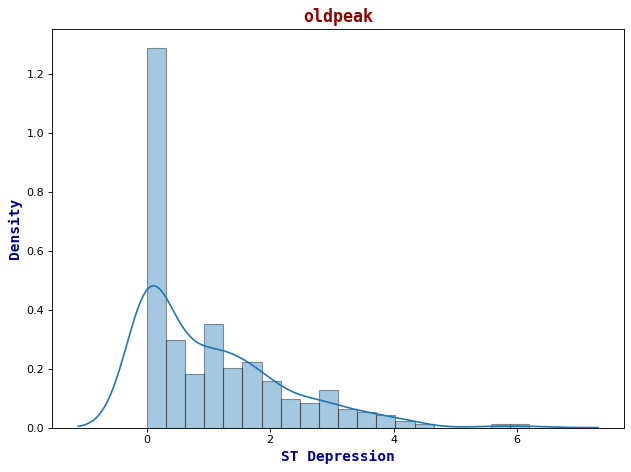

In [26]:
title_font = {"family" : "monospace", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "monospace", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
  plt.figure(figsize = (8, 6), dpi = 80)
  sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = 'k'), bins = 20);

  plt.title(i, fontdict = title_font)
  plt.xlabel(z, fontdict = axis_font)
  plt.ylabel("Density", fontdict = axis_font)

  plt.tight_layout()
  plt.show()

#### 4.1.1.1 Analysis Outputs(4)

**Age Variable**
* The vast majority of patients are between 50 and 60.
* There is a remarkable place on the chart. There is a decrease in patients between the ages of 47-and 50.
* It looks like there are no outliers in the variable.

**Trtbps Variable**
* The resting blood pressure of most patients is generally between 110 and 140.
* Values after 180 can be considered as outliers.
* There is hefty patient traffic between 115-120, 125-130, and 155-160 values.

**Cholesterol Variable**
* Cholesterol value in most patients is between 200-and 280.
* Values after 380 can be considered as outliers.

**Thalach Variable**
* The maximum heart rate achieved in most patients is between 145-and 170.
* In particular, The values before 80 can be considered outliers.

**Oldpeak Variable**
* Values of the vast majority of patients in the variable range from 0 to 1.5.
* Especially values after 2.5 can be considered as outliers.

#### 4.1.2 Categorical Variables (Analysis wtih Pie Chart)

In [27]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [28]:
categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood sugar", "Resting Electrocardiographic Results",
                      "Exercise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels", "Thal", "Target"]

In [29]:
# Changing the variable inside categoric_var
# With the new that we just created called categoric_axis_name

list(zip(categoric_var, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood sugar'),
 ('rest_ecg', 'Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('slope', 'The Slope of ST Segment'),
 ('ca', 'Number of Major Vessels'),
 ('thal', 'Thal'),
 ('target', 'Target')]

In [30]:
df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [31]:
list(df["cp"].value_counts())

[143, 87, 50, 23]

In [32]:
list(df["cp"].value_counts().index)

[0, 2, 1, 3]

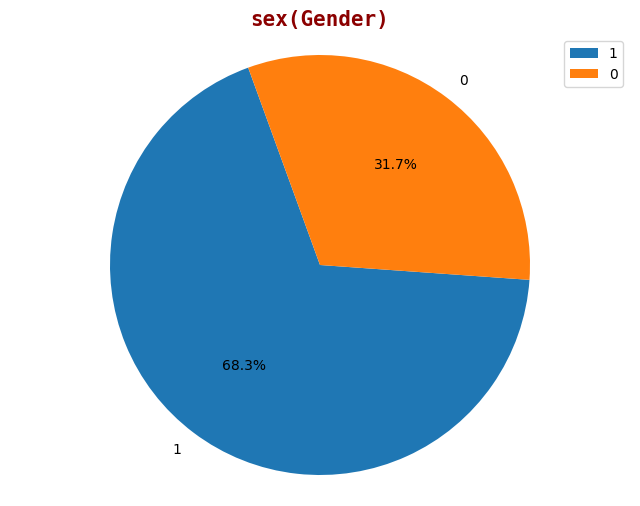

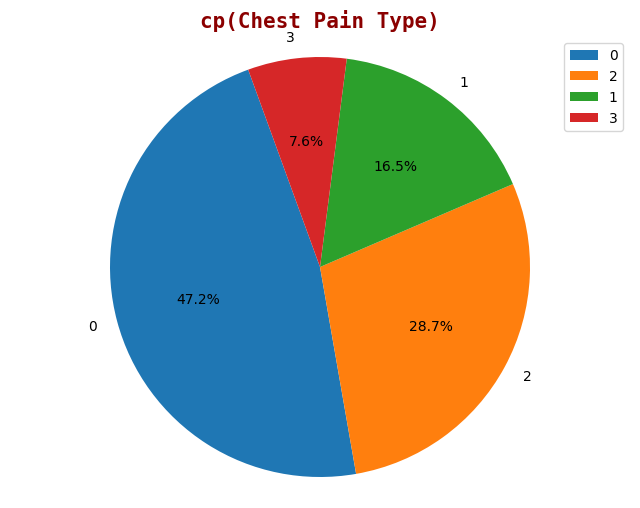

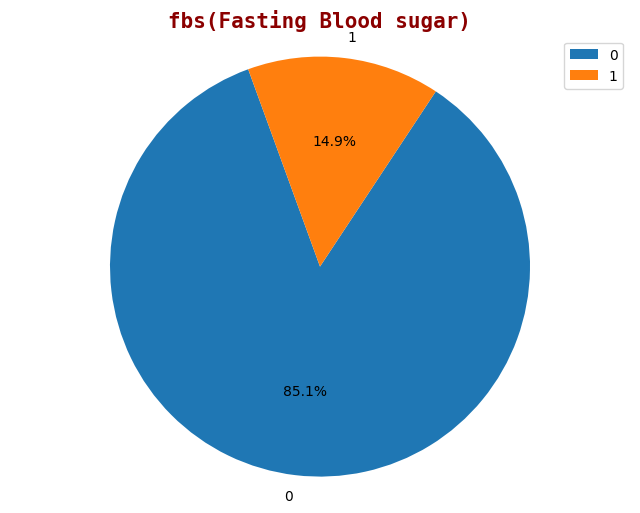

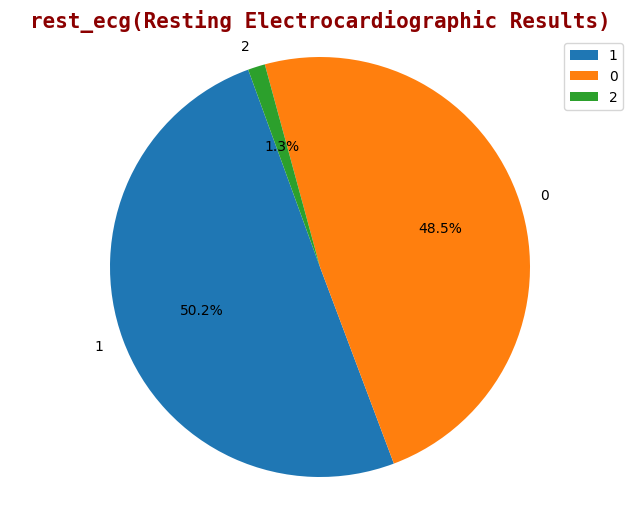

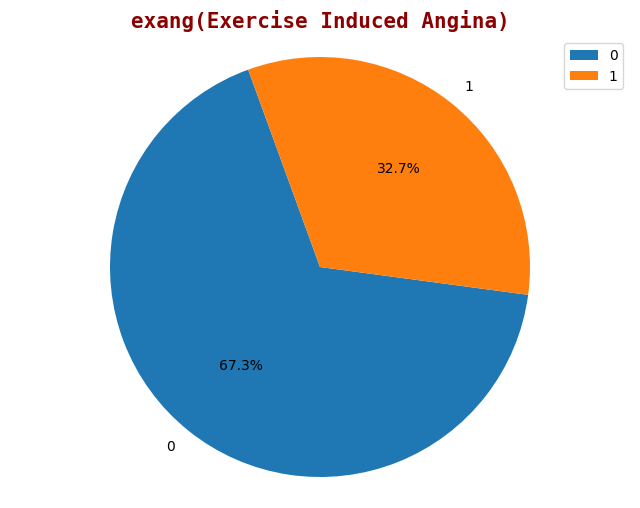

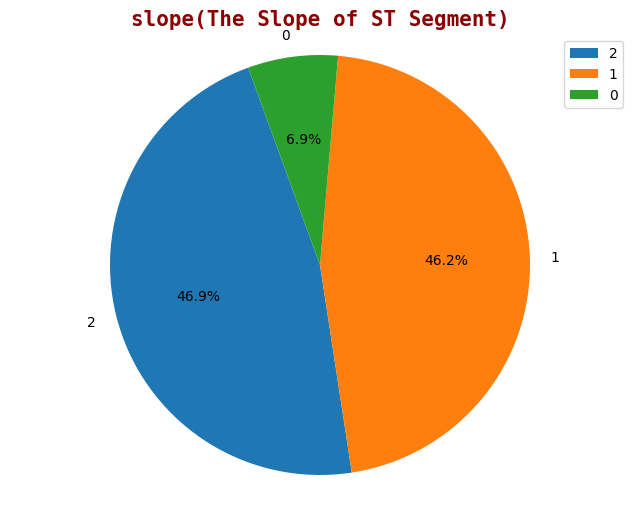

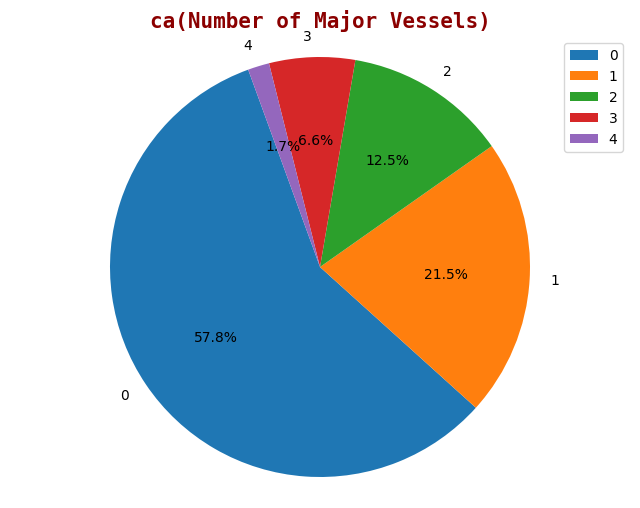

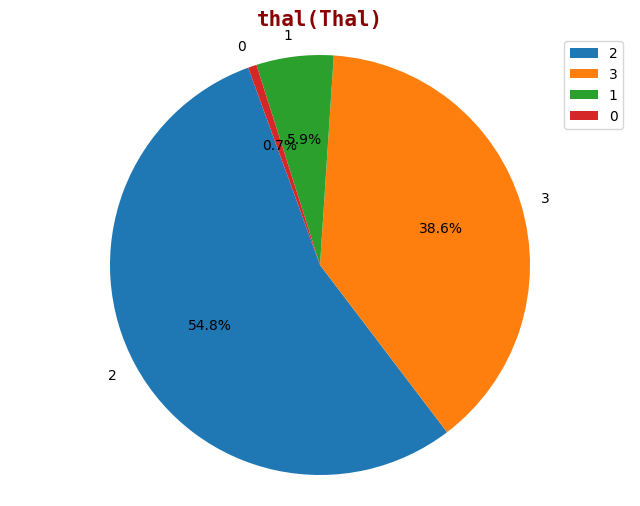

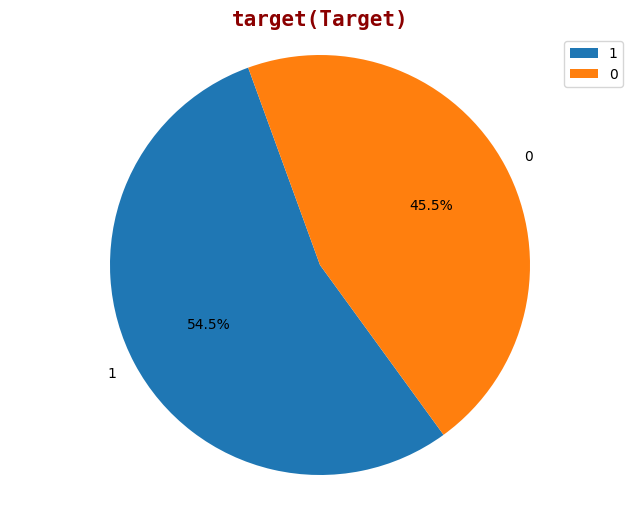

In [33]:
title_font = {"family" : "monospace", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "monospace", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
  fig, ax = plt.subplots(figsize = (8, 6))

  observation_values = list(df[i].value_counts().index)
  total_observation_values = list(df[i].value_counts())

  ax.pie(total_observation_values, labels = observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
  ax.axis("equal")

  plt.title((i + "(" + z + ")"), fontdict = title_font)
  plt.legend()
  plt.show()

#### 4.1.2.1 Analysis Outputs(5)

**Sex Variable**
* 68.3% of the patients are male, 31.7% are female.
* So, the number of male patients is more than twice that of female patients.

**Cp Variable**
* Almost half of the patients have an observation value of 0. In other words, there is asymptomatic angina
* Half of the patients are asymptomatic; they have pain without symptoms.
* If we examine the other half of the pie chart, 1 out of 4 patients has an observation value of 2.
* In other words, atypical angina is in 29% of the patients.
* This observation value shows patients with shortness of breath or non-classical pain.
* The other two observation values are less than the others.
* 16.5% of patients have a value of 1. In other words, typical angina is seen. Typical angina is the classic exertion pain that comes during any physical activity.
* The other 8% has the value of non-anginal pain, which is three types of angina.
* Non-anginal pain is the term used to describe chest pain that is not caused by heart disease or a heart attack.

**Fbs Variable**
* The vast majority of patients have an observation value of 1. In other words, 85%.
* The fasting blood sugar of these patients is more than 120 mg/dl.
The remaining 15 percent have a less than 120 mg/dl fasting blood glucose level.

**Rest_ecg Variable**
* The thing that draws attention to the image of this variable is that the number of patients with two observation values is negligible.
It has a value of 1.3 percent. When we look at all of these patients, it is not a very important number.
* This value represents the ST and T wavelengths of the patients.
* Another point that draws attention to this graph is; The total numbers of other patients with observation values of 1 and 0 are almost equal.
* The size of those with 1, that is, the orange part on the graph is 50.2%
* This means that the resting electrocardiographic results of these patients are normal.
* The percentage of patients with a value of 0 is 48.5%.
* That is, the patients' values of 48.5% are normal.

**Exang Variable**
* We have said that this variable stands for exercise-induced angina.
* Angina is the chest pain caused by the coronary artery's involuntary contraction that feeds the heart.
* According to the variable "exang," the pain caused by this angina is represented by a value of 1 if it occurs with any exercise and 0 if it does not.
* In this context, Values 0 are more than twice as values 1. More than half of the patients do not have exercise-induced angina.

**Slope Variable**
* The minimum observation value is 0 with 7 percent.
* This is patients with a downward slope of the ST wavelength.
* The other two observation values are almost equal to each other.
* The ST wavelength of half of the remaining patients is 1, that is straight, while the observation value of the other half is 2, that is, the * ST wavelength is sloped upwards.

**Ca variable**
* This variable is the number of great vessels colored by fluoroscopy.
* In more than half of the patients, 57.8 percent, the number of large vessels is 0. That is, the number of large vessels colored by fluoroscopy is absent.
* After 0 observation value, the other value with the most slices in the pie chart 1
* The number of large vessels observed in 21.5% of the patients is 1
* The majority of patients have an occlusion in their veins. Therefore, large vessels cannot be observed with the fluoroscopy technique.

**Thal Variable**
* The "Thal" variable is short for the "Thallium stress test."
* The thallium stress test is simply an imaging method that evaluates the amount of blood reaching the heart muscle and determines whether a person has coronary artery disease.
* There are three observation values in the description of this variable However, the pie chart shows four values. Values 0, 1, 2 and 3.
* According to our research, the observation value of 0 is null. Therefore, in the next step, 0 observation values will be returned to null and filled with logical data.
* In this context, according to the thallium stress test results, 54.8 percent of the patients have two observation values, so the test result appears to be expected.
* 36.8 percent has a value of 3, so we can say that this value is a reversible defect as an explanation.
5.9 percent of patients have a value of 1, so the test result for these patients is a fixed defect.

**Target Variable**
* More than half of the patients, 54.5 percent, have a heart attack risk. The remaining 45.5 percent have no heart attack risk.

#### 4.1.2.2 Examining the Missing Data According to the Analysis Result

In [34]:
# As you can see, in the Thal data above there are supposed to be 3 values (1, 2, 3).
# But it turns out there are 4 values (0, 1, 2, 3) in the Dataset, as i researching more to the Source of Data.
# The Dataset Author said the value of 0 indicating of missing values and i can just discard the row of the data.
# Sources: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion/234843#1288596
# But instead of deleting the missing value (0), i'm going to check out the 0 values of thal and replace it wih some value

df[df["thal"] == 0] # Finding the Location of 0 Value

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [35]:
# Replace the 0 value to Null Value

df["thal"] = df["thal"].replace(0, np.nan)

In [36]:
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,NaN,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,NaN,0


In [37]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [38]:
df["thal"].fillna(2, inplace = True)

In [39]:
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2.0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2.0,0


In [40]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2.0,1


In [41]:
df["thal"] = pd.to_numeric(df["thal"], downcast = "integer")

In [42]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [44]:
df["thal"].value_counts()

2    168
3    117
1     18
Name: thal, dtype: int64

# 4.2 Bi-variate Analysis

4.2.1 Numerical Variables - Target Variable(Analysis with FaceGrid)

In [45]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [46]:
numeric_var.append("target")

In [47]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

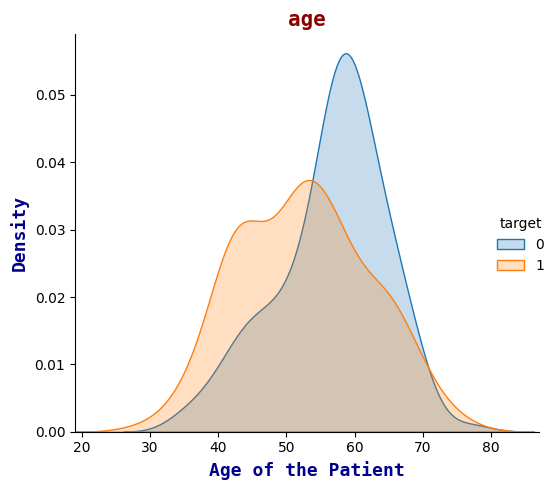

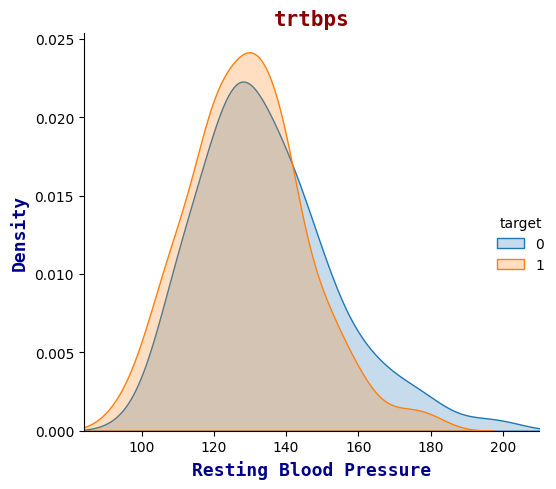

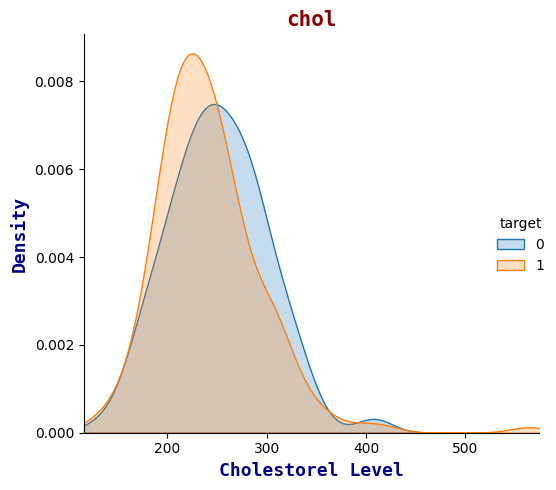

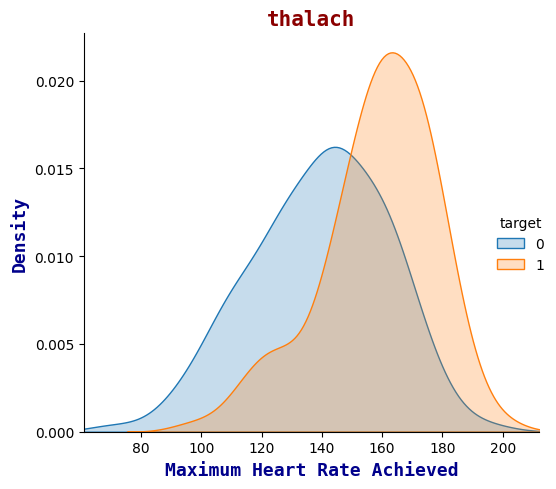

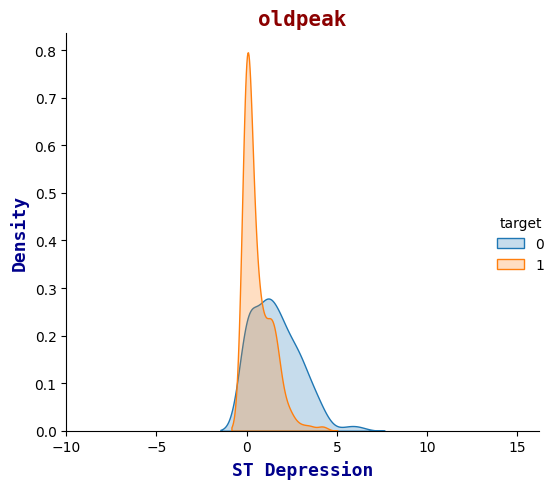

In [48]:
title_font = {"family" : "monospace", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "monospace", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
  graph = sns.FacetGrid(df[numeric_var], hue = "target", height = 5, xlim = ((df[i].min() - 10), (df[i].max() + 10)))
  graph.map(sns.kdeplot, i, shade = True)
  graph.add_legend()

  plt.title(i, fontdict = title_font)
  plt.xlabel(z, fontdict = axis_font)
  plt.ylabel("Density", fontdict = axis_font)

  plt.tight_layout()
  plt.show()

In [49]:
df[numeric_var].corr()

,age,trtbps,chol,thalach,oldpeak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [50]:
df[numeric_var].corr().iloc[:, [-1]]

,target
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalach,0.421741
oldpeak,-0.430696
target,1.000000


#### 4.2.1.1 Analysis Outputs(6)
Note :
* The KDE plot shows the density of the feature for each value of the target variable. There are usually two-colored humps representing the two values of the Target variable. If the humps are well-separated and non-overlapping, there is a correlation with the Target. If the humps overlap a lot, that means the feature is not well-correlated with the Target because the Target is equally as common on those values of the feature.

#### **Age - Target Variable**
* There is some interesting data in this chart. Typically, the general belief is that heart attack increases with age.
* However, the graph tells us that we are wrong about this.
* If you have noticed, the number of people at risk of heart attack decreases as age progresses.
* Let's take 55 as a base. There is an incredible increase in the blue graph after 55. In other words, there is a decrease in heart attack risk after the age of 55.
* On the contrary, a decrease occurs after 55 in the orange graph. In other words, there is a decrease in the risk of heart attack after the age of 55.
* To summarize, It's just a general thought that older people may be more likely to have a heart attack, but from a graph of the age and target distribution, it's clear that this isn't the case.
* And correlation between them -0.225439. There is a negative correlation, which we can call little.

#### **Trtbps - Target Variable**
* It is complicated to predict whether a patient will have a heart attack from resting blood pressure data.
* Because if you notice, the two graphs are almost identical.
* For example, according to the "trtbps" value of two possibilities, 130 is the maximum point.
* Also, the Bumps on the graph overlap too much.
* This means that the feature does not correlate well with the Target variable. So, in summary, A patient with a "trtbps" value of 130 may or may not be likely to have a heart attack.
* And according to the graph, we can say that there is little correlation between the two variables. Correlation between them -0.144931. There is a negative correlation, which we can call little.

#### **Chol - Target Variable**
* In the graph, we can say that a cholesterol value of 200-250 is precarious for the patients.
* If you have noticed, especially at the beginning of the graph, patients with and without heart attack risk a similar image, while the increase in the probability of having a heart attack from 180 to 250 is noticeable.
* After the value of 250, it becomes difficult to differentiate the probability of patients having a heart attack.
* The correlation between the two variables is -0.085239. In other words, we can say that it is negative, but very little.

#### **Thalach - Target Variable**
* There is a situation that is evident in this graph.
* The higher the maximum reached heart rate, the higher the probability of the patient having a heart attack.
* If you have noticed, there is a parallel increase in the two possibilities up to 150. However, after a value of 150, patients with a low probability of having a heart attack decrease, while patients with a high-risk probability increase incredibly.
* It is evident in the distinction between the two bumps in the graph. This indicates that there is a correlation between the two variables.
* The correlation between the two variables is 0.421741. In other words, we can say that it is positive and moderate.

#### **Oldpeak - Target Variable**
* When we look at the graph, if the value of this variable is between 0 and 1.5, there is a significant increase in the probability of having a heart attack.
* We can say that the range of 0 to 1.5 is the critical threshold for us.
* It is evident in the distinction between the two bumps in the graph. This indicates a correlation between the two variables.
* The correlation between the two variables is -0.430696. In other words, we can say that it is negative and moderate.

In [51]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

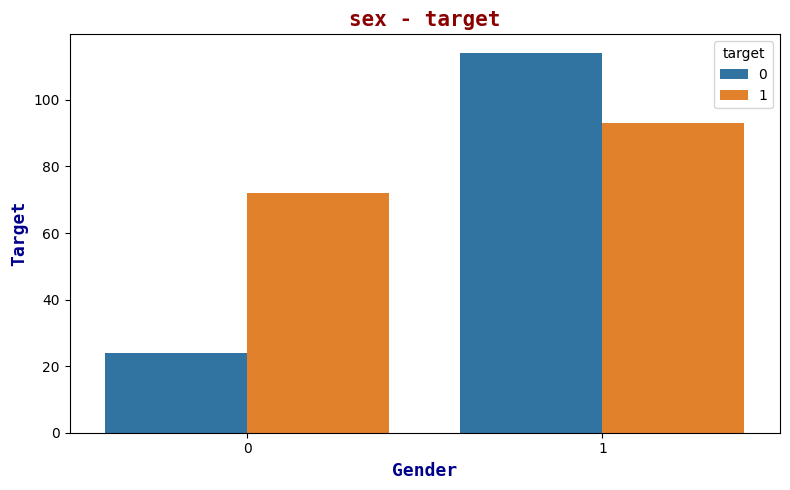

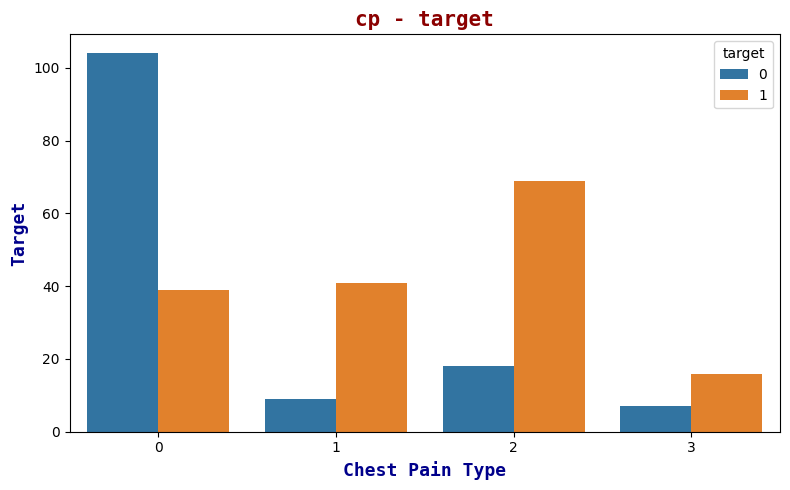

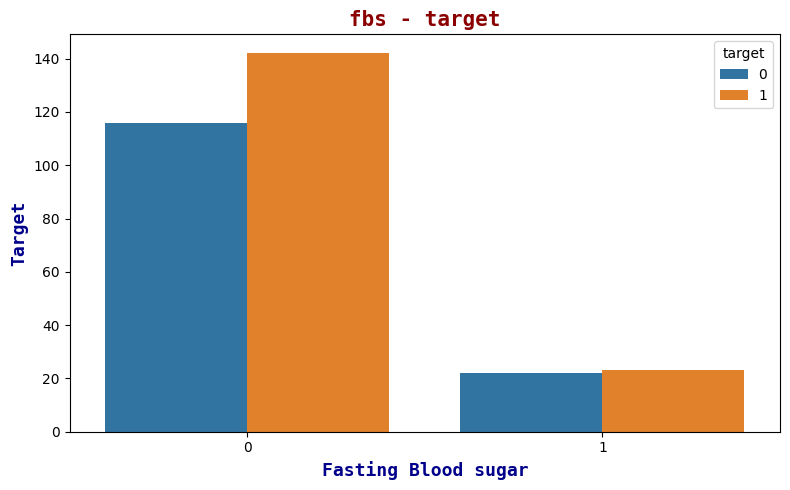

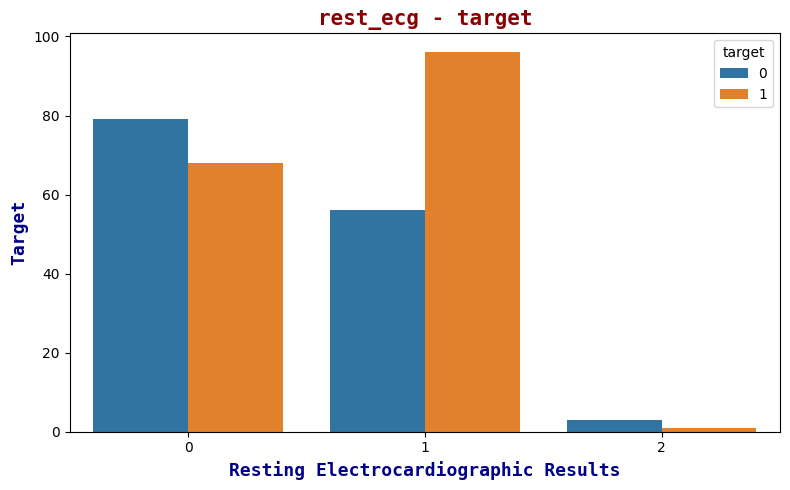

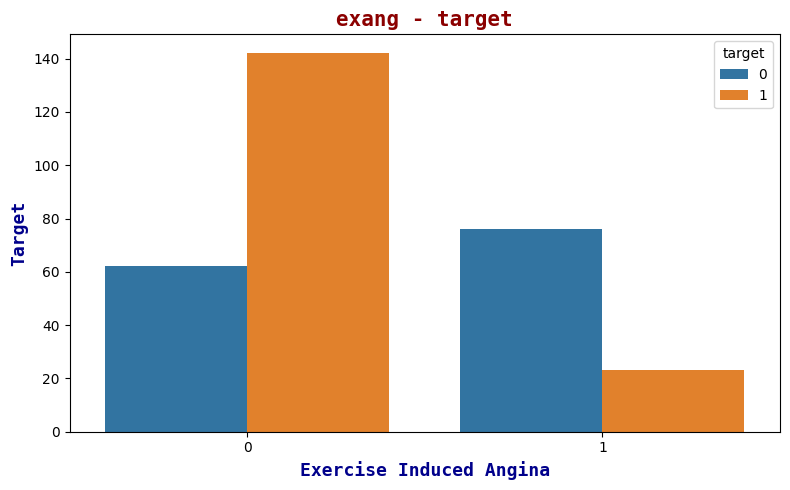

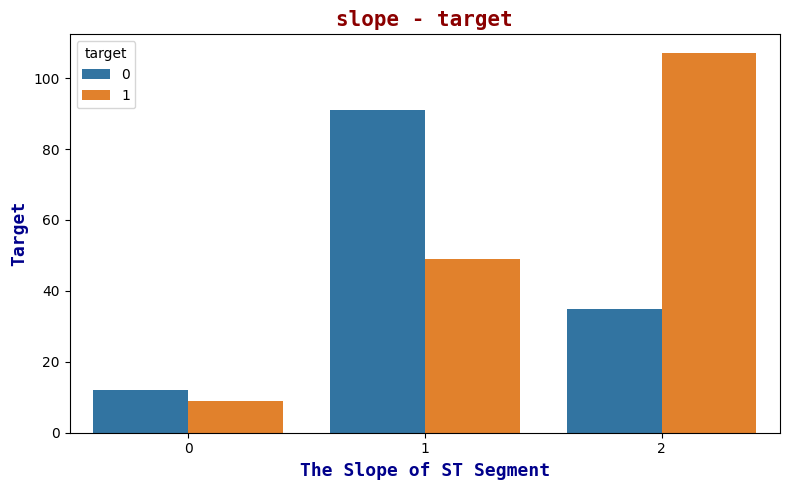

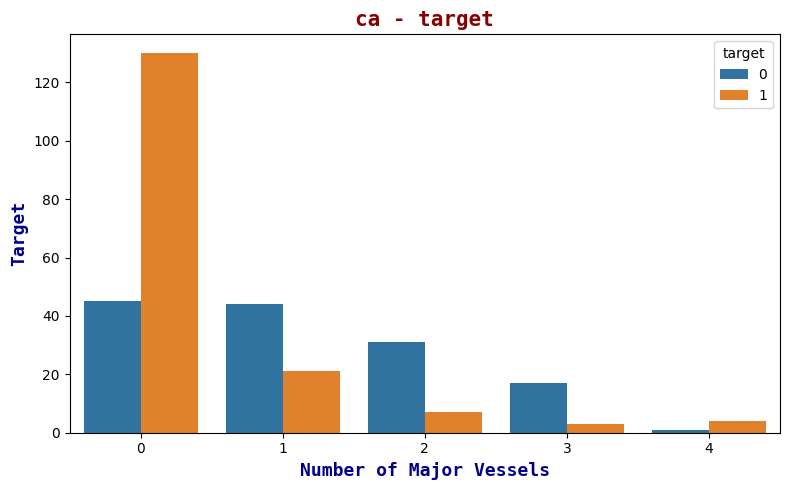

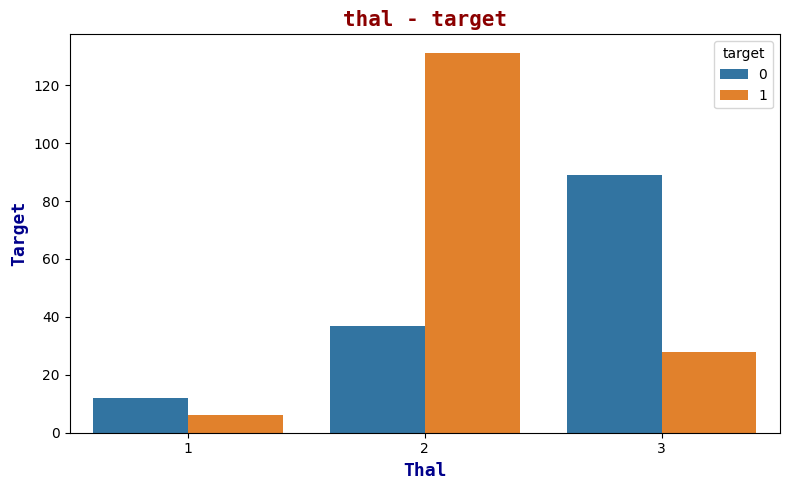

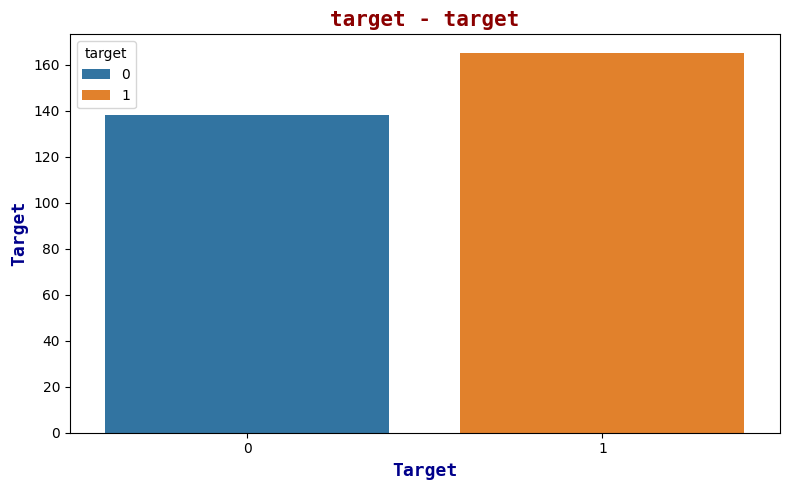

In [57]:
title_font = {"family" : "monospace", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "monospace", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
  plt.figure(figsize=(8, 5))
  sns.countplot(x=i, data=df[categoric_var], hue="target")

  plt.title(i + " - target", fontdict=title_font)
  plt.xlabel(z, fontdict=axis_font)
  plt.ylabel("Target", fontdict=axis_font)

  plt.tight_layout()
  plt.show()

In [52]:
 df[categoric_var].corr()

,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
sex,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757
slope,-0.030711,0.119717,-0.059894,0.093045,-0.257748,1.000000,-0.080155,-0.106310,0.345877
ca,0.118261,-0.181053,0.137979,-0.072042,0.115739,-0.080155,1.000000,0.143248,-0.391724
thal,0.211652,-0.169125,-0.011209,-0.013795,0.225508,-0.106310,0.143248,1.000000,-0.363322
target,-0.280937,0.433798,-0.028046,0.137230,-0.436757,0.345877,-0.391724,-0.363322,1.000000


In [53]:
df[categoric_var].corr().iloc[:, -1]

sex        -0.280937
cp          0.433798
fbs        -0.028046
rest_ecg    0.137230
exang      -0.436757
slope       0.345877
ca         -0.391724
thal       -0.363322
target      1.000000
Name: target, dtype: float64

#### 4.2.2.1 Analysis Outputs(7)

**Sex - Target Variable**
* Patients at high risk of heart attack from women are almost more than half of those with low.
* The situation is different for those with an observation value of 1, that is, for men. The blue-colored bar has more observation values.
* So men are more likely than not to have a heart attack.
* In summary, female patients are at higher risk for heart attack
The correlation between the two variables is -0.280937. In other words, we can say that there is a negative low-intensity correlation.

**Cp - Target Variable**
* First bar graph has an observation value of 0, asymptomatic pains. This pain was pain that occurred without symptoms.
* Patients with this pain are less likely to have a heart attack. When we look at the probability of not having a heart attack, we can say that it is almost three times the other.
* In the other three types of pain, having a heart attack is almost three times higher than the risk of not having it.
* In summary, If a patient's "cp" variable is 1, 2, or 3, we can say that the risk of heart attack is high.
* The correlation between the two variables is 0.433798. In other words, we can say that there is a positive, moderately strong correlation.

**Fbs - Target Variable**
* The risk of heart attack is slightly higher in those with a 0 observation value as fasting blood sugar.
* Patients with fasting blood sugar lower than 120 mg/dl can be positioned as risky.
* If we look at the value of 1 observation value, the situation seems to be somewhat equal here.
* In other words, it is a little challenging to say anything definite about heart attack in patients with fasting blood sugar greater than 120 mg/dl.
* The correlation between the two variables is -0.028046. In other words, we can say that there is a very low-intensity correlation in the negative direction.

**Rest_ecg - Target Variable**
* Attention should be paid to patients with a "rest ecg" value of 1. Because the risk of having a heart attack is almost two times higher than that of not having a heart attack.
* The other two observation values are also more likely not to have a heart attack.
* The correlation between the two variables is 0.137230. In other words, we can say that there is a positive low-intensity correlation.

**Exang - Target Variable**
Pain due to exercise does not affect the heart attack.
* If the patient's "exang" variable is 1, that is, if he has exercise-related angina, the probability of not having a heart attack is higher.
* In contrast, patients who do not have exercise-related angina are more likely to have a heart attack.
This means that exercise-related pain has nothing to do with a heart attack.
* The correlation between the two variables is -0.436757. In other words, we can say that there is a negative, moderately strong correlation.

**Slope - Target Variable**
* It is necessary to pay attention to the patients with a "slope" variable of 2.
* Because patients with an observation value of 2 are three times more likely to have a heart attack than not having a heart attack.
* If we examine other values, the risk of heart attack is lower in patients with an observation values of 0 and 1.
* Especially if the observation value is 1, if it has a flat slope, we can say that it is two times more likely not to have a heart attack.
* The correlation between the two variables is 0.345877. In other words, we can say that there is a positive, moderately strong correlation.

**Ca - Target variable**
* The group at risk for this variable is patients with an observation value of 0.
* If you notice, the risk of heart attack is almost three times higher in patients with an observation value of 0.
* For 1, 2, and 3 observation values, this shows the opposite situation. In other words, patients with "ca" observation values of 1, 2, and 3 are almost twice as likely to have a heart attack as those not having them.
* There is something remarkable here. Although the number of patients with a "CA" value of 4 is less than the general population, the risk of having a heart attack seems to be higher.
* The correlation between the two variables is -0.363322. In other words, we can say that there is a negative, moderately strong correlation.

**Thal - Target Variable**
* Patients with an observation value of 2 are three times more likely to have a heart attack than if they have not.
* The opposite is true for other values. The situation of not having a heart attack appears to be higher.
* The correlation between the two variables is -0.363322. In other words, we can say that there is a negative, moderately strong correlation.

### 4.2.3 Examining Numeric Variables Among Themselves (Analysis with Pain Plot)

In [61]:
numeric_var.remove("target")

In [62]:
df[numeric_var].head()

,age,trtbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


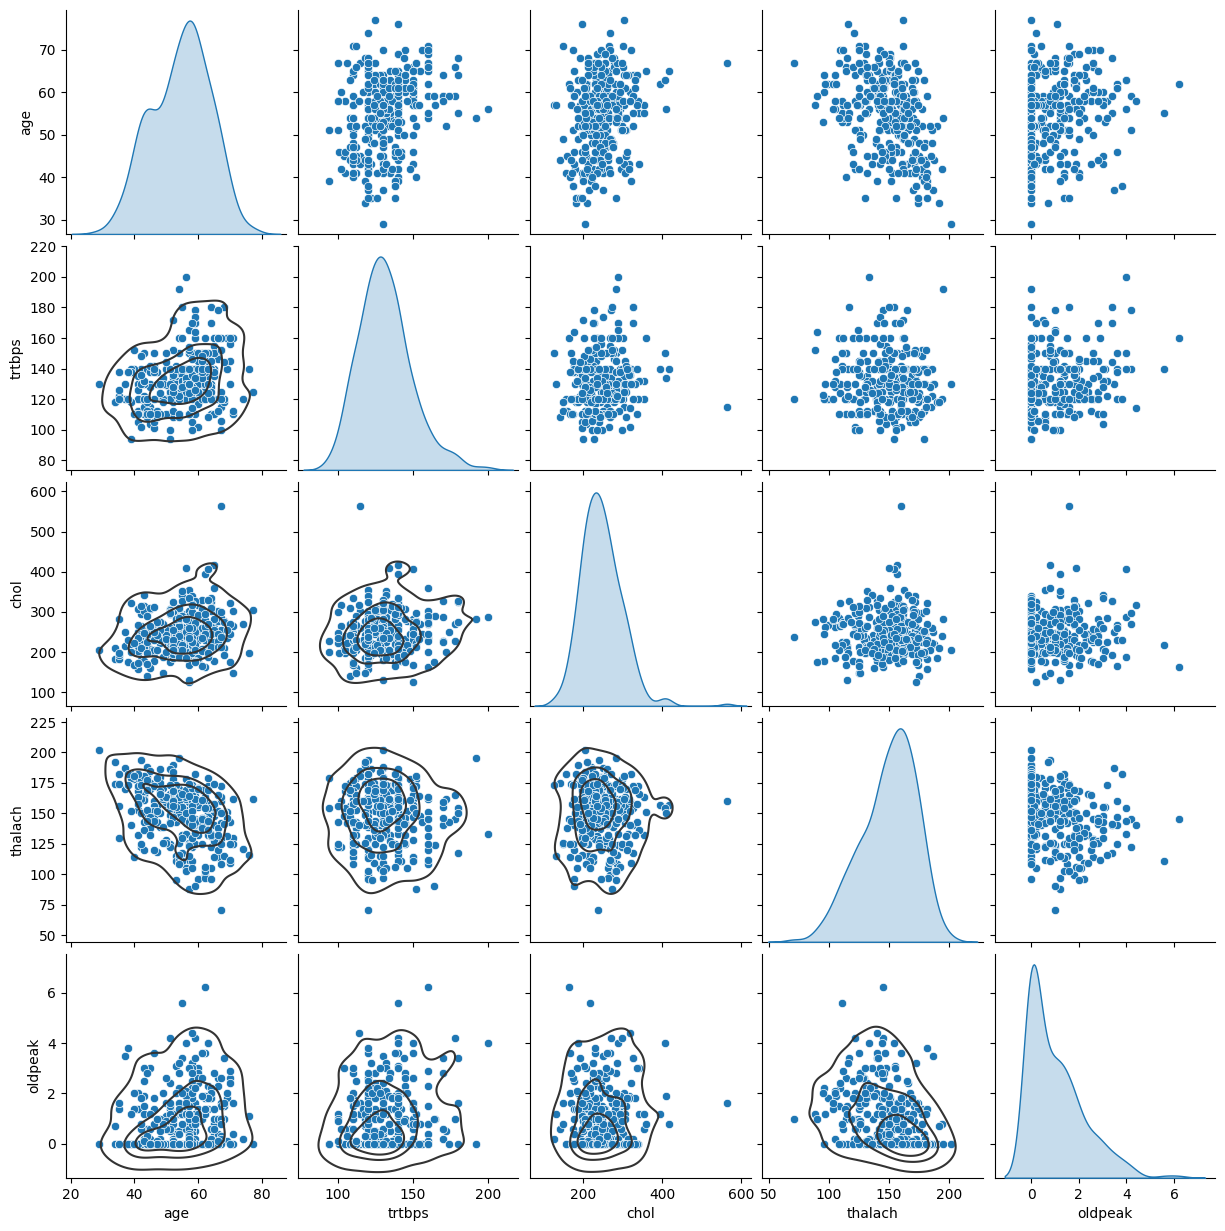

In [63]:
graph = sns.pairplot(df[numeric_var], diag_kind = "kde")
graph.map_lower(sns.kdeplot, levels = 4, color = ".2")
plt.show()

#### 4.2.3.1 Analysis Outputs(8)
Note :
* The pair plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis.

* The scatter plot; is a drawing or mathematical diagram that typically uses Cartesian coordinates to display the values of two variables in a dataset. If the points are close to each other and have a regular appearance in terms of their directions, we can say a strong connection between the two variables. There is a directly proportional relationship between two variables in positive directional relationships. An increase in one variable causes an increase in the other variable. In negative relationships, there is an inversely proportional relationship between the variables. When the value of one variable decreases, the other variable also decreases.

**Age Variable**
* The age variable with the most relationship is the "thalach" variable.
* There is a collection of points extending in the southwest direction.
* There is a negative correlation since the points are pointing downwards.
* However, since the points are somewhat scattered, this correlation is moderate.

**Trtbps Variable**
* The relationship between "Trtbps" and other variables is weak.
* There is clutter in the graphics in general.
* With the age variable, the dots appear a little more often. There is a positive correlation.
* The lowest correlation is with the "thalach" variable. The dots are incredibly messy. There is no smooth distribution.

**Chol Variable**
* The variables that have the highest correlation with the variable "chol" are "age" and "trtbps".
* However, the relationship between the "age" variable is slightly higher.
* So cholesterol increases with age.
* There is almost no relationship with other variables.

**Thalach Variable**
* The age variable has the most relationship with the Thalach variable. There seems to be a moderately negative relationship.
* There is not much correlation between the variable "trtbps" and "chol". The dots are too scattered.
* When we look at the relationship with the "old peak" variable, we can say a close relationship with the middle level.

**Oldpeak Variable**
* We cannot find an explicit expression when interpreting the graphics of this variable because the relationship with all variables is similar to each other.
* However, we can say this in general: There is a close relationship with moderate with all variables.

### 4.2.4 Feature Scaling with the RobustScaler Method

In [64]:
from sklearn.preprocessing import RobustScaler

In [65]:
robust_scaler = RobustScaler()

In [66]:
scaled_data = robust_scaler.fit_transform(df[numeric_var])

In [67]:
scaled_data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [68]:
type(scaled_data)

numpy.ndarray

In [70]:
df_scaled = pd.DataFrame(scaled_data, columns = numeric_var)
df_scaled.head()

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250
